# Incremental Regression
Regina Ceballos Mondragón
147663
 
## Lectura de datos

In [1]:
import pandas as pd
import numpy as np
from random import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing

In [2]:
df = pd.read_csv("regLin.csv")

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['X']], df[['y']], train_size=0.75)
X_train, X_test, Y_train, Y_test = np.array(X_train), np.array(X_test), np.array(Y_train), np.array(Y_test)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Regresión sin estandarizar

In [4]:
X = np.concatenate((np.ones((len(X_train), 1)), X_train), axis=1)
w = np.ones((1,len(X[0])))
error = []
I = [i for i in range(0,len(X))]
eta = 0.05
for i in range(0, len(X)):
    error.append(np.mean((w[0][0] + w[0][1] * X_train[i]- Y_train[i])**2))
    V = np.dot(w, X[i])
    for j in range (0, len(w)+1):
        w[0][j] += eta * (Y_train[i]- V) * X[i][j]

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in multiply
  import sys
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in add
  # Remove the CWD from sys.path while we load stuff.


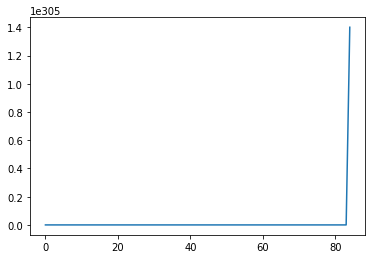

In [5]:
plt.plot(I,error)
plt.scatter(i, error[i], color='red')
plt.show()

## Con datos estandarizados y eta = 0.05

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['X']], df[['y']], train_size=0.75)
X_train, X_test, Y_train, Y_test = np.array(X_train), np.array(X_test), np.array(Y_train), np.array(Y_test)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [7]:
X = np.concatenate((np.ones((len(X_train), 1)), X_train), axis=1)
w = np.ones((1,len(X[0])))
error = []
I = [i for i in range(0,len(X))]
eta = 0.05
for i in range(0, len(X)):
    error.append(np.mean((w[0][0] + w[0][1] * X_train[i]- Y_train[i])**2))
    V = np.dot(w, X[i])
    for j in range (0, len(w)+1):
        w[0][j] += eta * (Y_train[i]- V) * X[i][j]

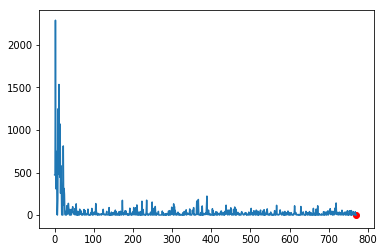

In [8]:
plt.plot(I,error)
plt.scatter(i, error[i], color='red')
plt.show()

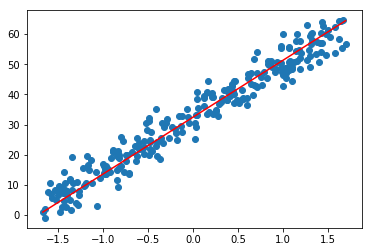

In [9]:
plt.scatter(X_test, Y_test)
x0 = np.amin(X_test)
x1 = np.amax(X_test)
b = w[0][0]
m = w[0][1]
y0 = m*x0 + b
y1 = m*x1 + b
plt.plot([x0, x1], [y0, y1], c='r')    
plt.show()

## Con eta = 0.1

In [10]:
X = np.concatenate((np.ones((len(X_train), 1)), X_train), axis=1)
w = np.ones((1,len(X[0])))
error = []
I = [i for i in range(0,len(X))]
eta = 0.1
for i in range(0, len(X)):
    error.append(np.mean((w[0][0] + w[0][1] * X_train[i]- Y_train[i])**2))
    V = np.dot(w, X[i])
    for j in range (0, len(w)+1):
        w[0][j] += eta * (Y_train[i]- V) * X[i][j]

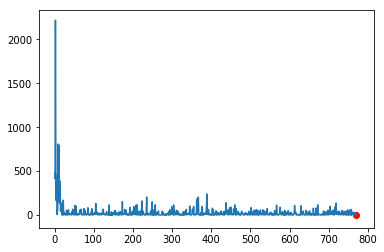

In [11]:
plt.plot(I,error)
plt.scatter(i, error[i], color='red')
plt.show()

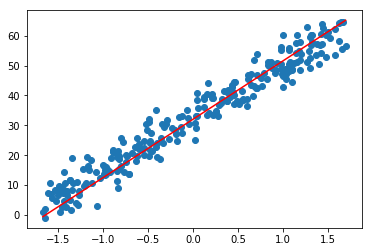

In [12]:
plt.scatter(X_test, Y_test)
x0 = np.amin(X_test)
x1 = np.amax(X_test)
b = w[0][0]
m = w[0][1]
y0 = m*x0 + b
y1 = m*x1 + b
plt.plot([x0, x1], [y0, y1], c='r')    
plt.show()

## Con eta = 1

In [13]:
X = np.concatenate((np.ones((len(X_train), 1)), X_train), axis=1)
w = np.ones((1,len(X[0])))
error = []
I = [i for i in range(0,len(X))]
eta = 1
for i in range(0, len(X)):
    error.append(np.mean((w[0][0] + w[0][1] * X_train[i]- Y_train[i])**2))
    V = np.dot(w, X[i])
    for j in range (0, len(w)+1):
        w[0][j] += eta * (Y_train[i]- V) * X[i][j]

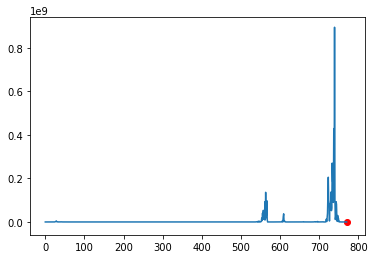

In [14]:
plt.plot(I,error)
plt.scatter(i, error[i], color='red')
plt.show()

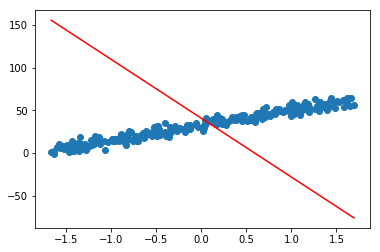

In [15]:
plt.scatter(X_test, Y_test)
x0 = np.amin(X_test)
x1 = np.amax(X_test)
b = w[0][0]
m = w[0][1]
y0 = m*x0 + b
y1 = m*x1 + b
plt.plot([x0, x1], [y0, y1], c='r')    
plt.show()

# Avance cada 100 iteraciones

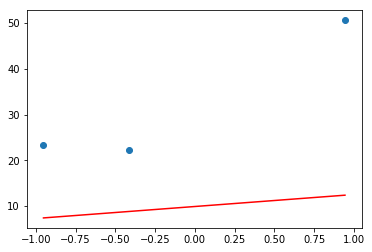

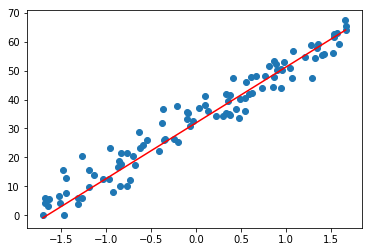

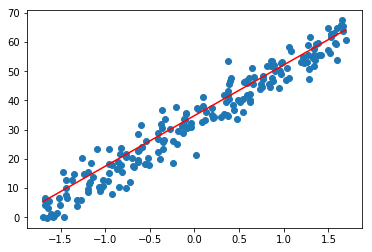

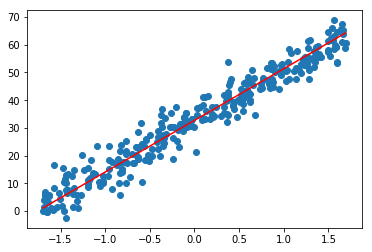

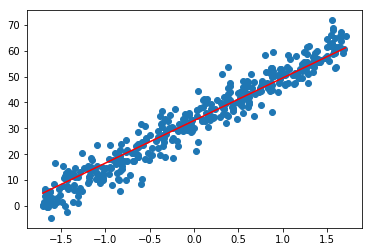

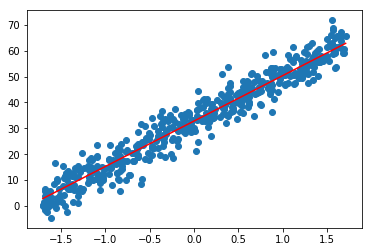

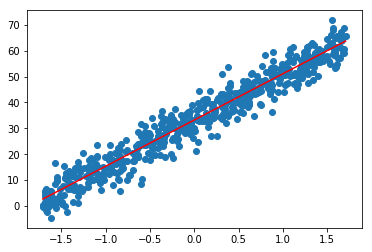

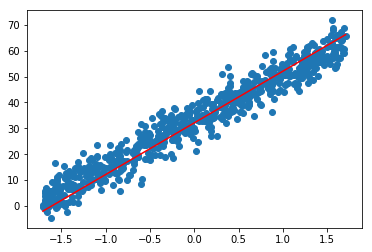

In [16]:
eta = 0.1
X = np.concatenate((np.ones((len(X_train), 1)), X_train), axis=1)
w = np.ones((1,len(X[0])))

for i in range(0, len(X)):
    V = np.dot(w, X[i])
    for j in range (0, len(w)+1):
        w[0][j] = w[0][j] + eta * (Y_train[i]- V) * X[i][j]
    if i % 100 == 2:
        plt.scatter(X_train[:i+1], Y_train[:i+1])
        x0 = np.amin(X_train[:i+1])
        x1 = np.amax(X_train[:i+1])
        b = w[0][0]
        m = w[0][1]
        y0 = m*x0 + b
        y1 = m*x1 + b
        plt.plot([x0, x1], [y0, y1], c='r')    
        plt.show()
        

# Resultados

Si no estandarizamos los datos, el error crece tanto que el programa no funciona. Se interrumpe aproximadamente en la iteración 90. Lo que significa que utilizó la minoría de los datos.

Estandarizando los datos, la regresión funciona bastante bien. La diferencia entre eta = 0.05 y eta = 0.1 no es notable. Con eta = 1, la regresión no funciona.

